In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import networkx
import pandas as pd
from scipy.stats import entropy
from scipy.sparse.csgraph import connected_components

%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.append("../code/")

In [4]:
from RBmodel.main import RBmodel

In [5]:
net = RBmodel(N=10, avk=3, maxT=1e4, mu=0.8, J=np.ones(10))

In [84]:
net.runs(n_runs=10)
len(net.ss)

30

In [104]:
%time
net.runs(n_runs=10000)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 4.29 µs


In [105]:
from sklearn.decomposition import PCA

In [106]:
ss_pca = pd.DataFrame(PCA(n_components=2).fit_transform(net.ss), columns=["x", "y"])

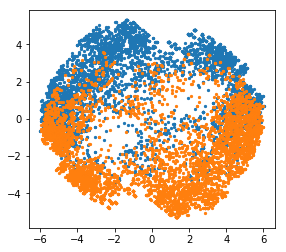

In [107]:
fig, ax = plt.subplots(1,1, figsize=(5,4))
ax.set_aspect(1)
for lab, sdf in ss_pca.groupby(net.ss[7]):
    ax.scatter(*(sdf.values.T), s=5)

In [108]:
net.ss.shape

(12140, 50)

In [109]:
pd.to_pickle(net.J, "../J.p")

In [110]:
net.ss.to_pickle("../test.p")